<a href="https://colab.research.google.com/github/veraayangg/Tran/blob/main/Forecast_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Website Visitor Forecast Analysis




#Goal and Mission
The purpose of this analysis is to gain insights into an academic website visitor dataset and to forecast website traffic in the following 12 months. The dataset contains columns of:

*   Day - Day of week in text form (Sunday, etc.)
*   Day.Of.Week - Day of week in numeric form (1-7)
*   Date - Date in mm/dd/yyyy format
*   Page.Loads - Daily number of pages loaded
*   Unique.Visits - Daily number of visitors from whose IP addresses there haven't been hits on any page in over 6 hours
*   First.Time.Visits - Number of unique visitors who do not have a cookie identifying them as a previous customer
*   Returning.Visits - Number of unique visitors minus first time visitors

The original dataset can be found: https://www.kaggle.com/datasets/bobnau/daily-website-visitors

#Package Preparing and Data Pre-Processing








**Data Loading and Package Reading**

*   Packaging loading and importing functions:




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go
from google.colab import files

import chart_studio.tools as tls


ModuleNotFoundError: No module named 'chart_studio'

*   Reading the dataset:




In [ ]:
d = pd.read_csv("daily-website-visitors.csv")

*   A brief look at the dataset:



In [ ]:
d.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/14,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/14,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/14,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/14,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/14,"3,316","2,366","2,130",236



*   Types of data that the dataset contains:




In [ ]:
d.dtypes

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object


*  Since the original dataset contains commas, I removed all commas and changed data formats from "object" to "float" and "int" for important variables.

In [ ]:
d['Returning.Visits'] = pd.to_numeric(d['Returning.Visits'], errors='coerce')
d['Unique.Visits'] = d['Unique.Visits'].str.replace(',','')
d['Unique.Visits'] = pd.to_numeric(d['Unique.Visits'], errors='coerce')
d['First.Time.Visits'] = d['First.Time.Visits'].str.replace(',','')
d['First.Time.Visits'] = pd.to_numeric(d['First.Time.Visits'], errors='coerce')

d.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/14,"2,146",1582,1430,152.0
1,2,Monday,2,9/15/14,"3,621",2528,2297,231.0
2,3,Tuesday,3,9/16/14,"3,698",2630,2352,278.0
3,4,Wednesday,4,9/17/14,"3,667",2614,2327,287.0
4,5,Thursday,5,9/18/14,"3,316",2366,2130,236.0


* Now the important columns are in numerical formats:

In [ ]:
d.dtypes

Row                    int64
Day                   object
Day.Of.Week            int64
Date                  object
Page.Loads            object
Unique.Visits          int64
First.Time.Visits      int64
Returning.Visits     float64
dtype: object

* It is important to check for errors and missing values before analyzing. Based on the following results, the columns from ‘Day’ through ‘First.Time.Visits’ have no missing value. However, the column 'Returning. Visits' has 1 missing data:

In [ ]:
d.isnull().sum()

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     1
dtype: int64

* Since the 'Returning.Visits' column could be numerical, the missing value was replaced by 0:



In [ ]:
d.fillna(0,inplace=True)
d.isnull().sum()

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

# Descriptive Data Analysis

**Distribution**
*  The distribution of 'Unique Visits', 'First.Time.Visits', and 'Returning. Visits' are displayed below. The distribution of all variables is close to symmetric
* The number of Unique Visits ranges from 400~5700 per day; the amount of First Time Visits ranges from ~300 to 4600 per day; the amount of Returning Visits ranges from 100 to 1000 per day.
* These distributions make sense since Unique Visits = First Time Visits + Returning Visits

Text(0.5, 1.0, 'Distribution of Unique Visits')

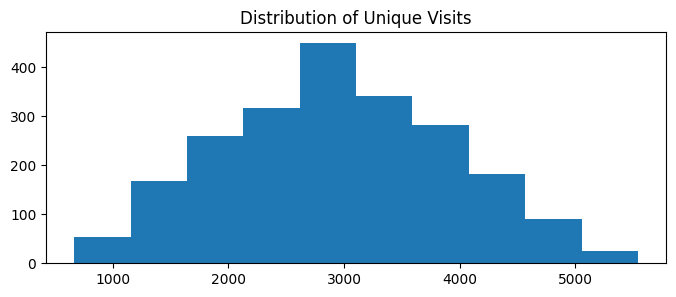

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(d['Unique.Visits'])
plt.title("Distribution of Unique Visits")

Text(0.5, 1.0, 'Distribution of First Time Visits')

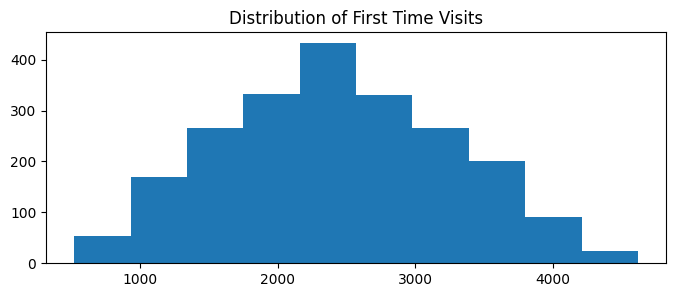

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(d['First.Time.Visits'])
plt.title("Distribution of First Time Visits")

Text(0, 0.5, 'Visits')

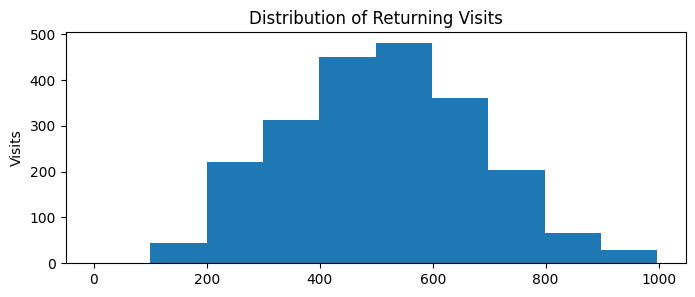

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(d['Returning.Visits'])
plt.title("Distribution of Returning Visits")
plt.ylabel('Visits')

**Seasonality and Trend of Web Visiting**
*   Weekday - In this section, I calculated the average of 'Unique.Visits' for each weekday from 9/14/14 to 8/19/20. Based on the graph, **Wednesday** has the highest average unique visits.


Text(0, 0.5, 'Visits')

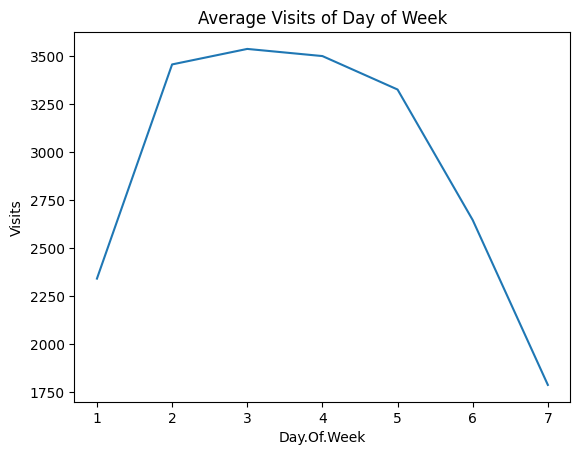

In [ ]:
d.groupby(['Day.Of.Week'])['Unique.Visits'].mean().plot()
plt.title ('Average Visits of Day of Week')
plt.ylabel('Visits')

* Month - To find out which month has the highest number of unique visits, I extracted the month from the 'Date' column and calculated the average unique visits according to each month. It is shown that **April** is the peak average web visiting month followed by **November**, which is possibly due to final exams.
* The lowest web visits happen in **July** to **August** due to summer vacation.

Text(0, 0.5, 'Visits')

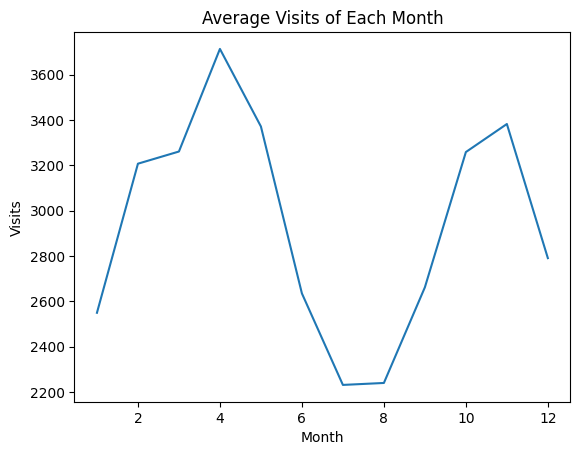

In [ ]:
d['Date'] = pd.to_datetime(d['Date'])
d['Month'] = d['Date'].dt.month
d.groupby(['Month'])['Unique.Visits'].mean().plot()
plt.title ('Average Visits of Each Month')
plt.ylabel('Visits')

# Forecasting Model on Visitors

In this section, I forecasted the monthly unique visits and returning visits in the next 12 periods using the Holt-Winters model. Using plotly functions, I built interactive graphs to provide a direct view of comparisions between past visits and forecasted visits

**Forecasting of *Unique Visits* In The Following 12 Months**


*   Before the forecasting analysis, let's have a look at the time-series unique visiting on a daily base. The graph is displayed below:




Text(0.5, 1.0, 'Time Series on Unique Visiting - Daily Based')

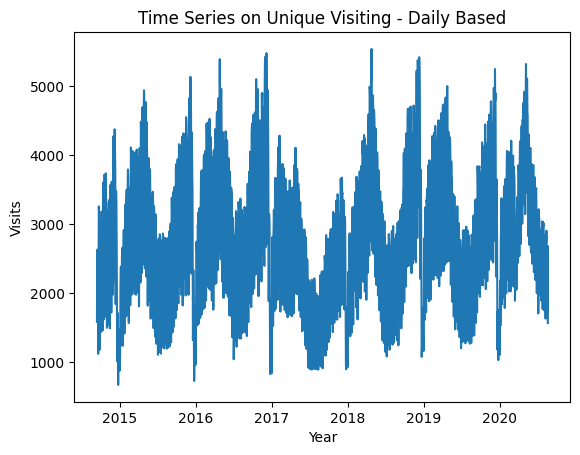

In [ ]:
d['Date1'] = pd.to_datetime(d['Date'])
d.set_index('Date1', inplace=True)
plt.plot(d['Unique.Visits'])
plt.ylabel('Visits')
plt.xlabel('Year')
plt.title('Time Series on Unique Visiting - Daily Based')


*   To forecast the MONTHLY visits in the next 12 months, I resampled the time series data from daily to a monthly frequency and calculated the average unique visits of each month from 9/14/14 to 8/19/20. The graph is displayed below:



Text(0.5, 1.0, 'Time Series on Unique Visiting - Monthly Based')

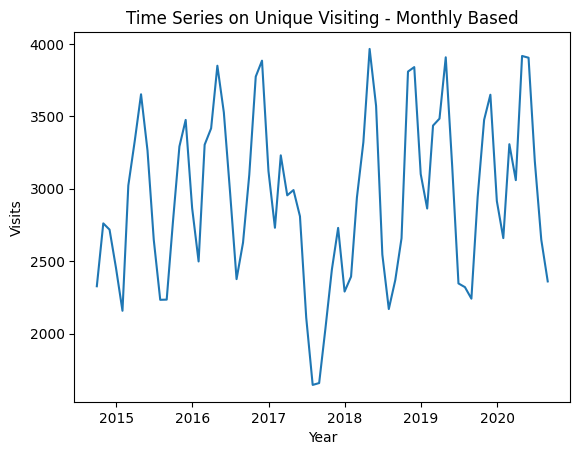

In [ ]:
d_monthly = d['Unique.Visits'].resample('M').mean()
plt.plot(d_monthly)
plt.ylabel('Visits')
plt.xlabel('Year')
plt.title('Time Series on Unique Visiting - Monthly Based')



*   Now it's time to build the Holt-Winters model based on exponential smoothing, seasonal, and trend. The seasonal_periods is set to 12 since the d_monthly dataset is in monthly frequency.
*   The model forecast period is set to 12 since we are looking for predication of next year's unique visits (Sep. 2020 - August.2021)



In [ ]:
model = ExponentialSmoothing(d_monthly, seasonal='add', trend= 'add', seasonal_periods=12).fit()
forecast = model.forecast(12)
print(forecast)

2020-09-30    2864.892045
2020-10-31    3519.276332
2020-11-30    3666.197417
2020-12-31    3075.081590
2021-01-31    2831.106525
2021-02-28    3483.647581
2021-03-31    3534.934534
2021-04-30    3957.700844
2021-05-31    3593.909198
2021-06-30    2842.988418
2021-07-31    2429.821956
2021-08-31    2461.277034
Freq: M, dtype: float64




*   The graph of forecasted unique visits is shown below:




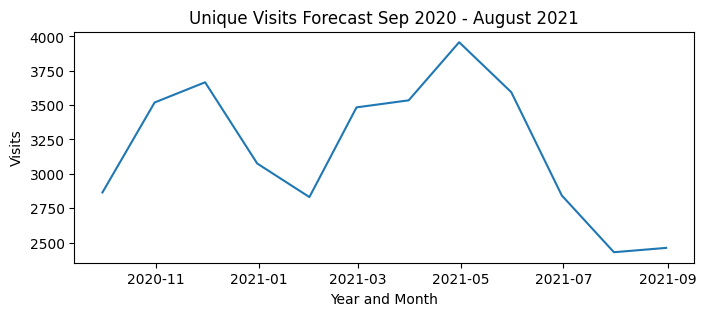

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(forecast)
plt.title('Unique Visits Forecast Sep 2020 - August 2021')
plt.xlabel('Year and Month')
plt.ylabel('Visits')
plt.show()



---



*   I used plotly function to create an interactive graph demonstrating the monthly performance of past and forecast visits over the years.
*   Plotly codes resource: https://plotly.com/python/creating-and-updating-figures/



In [ ]:
forecast1 = pd.concat([d_monthly, forecast], axis=1)
forecast1 = forecast1.rename(columns={'Unique.Visits': 'Past', 0: 'Forecast'})

In [ ]:
fig = px.line()
fig.add_scatter(x=forecast1.index, y=forecast1['Past'], mode='lines', name='Past')
fig.add_scatter(x=forecast1.index, y=forecast1['Forecast'], mode='lines', name='Forecast')
fig.update_layout(
    title=dict(text='Website Unique Visits Past vs Forecast', x=0.5),
    xaxis=dict(title='Year'),
    yaxis_title='Number of Unique Visits'
)
fig.show()

In [ ]:
# Export the figure as an HTML file
fig.write_html("my_plotly_graph.html")

# Download the file to your local machine
files.download("my_plotly_graph.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Forecasting of *First-Time Visits* In The Following 12 Months**


Same operation was performed on 'Returning Visits', which the returning visits in the next 12 monnths are being forcasted and graphed.

Text(0, 0.5, 'Year')

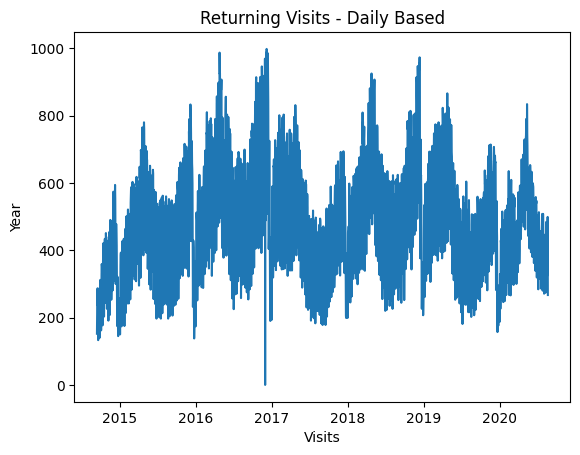

In [ ]:
d['Date1'] = pd.to_datetime(d['Date'])
d.set_index('Date1', inplace=True)
plt.plot(d['Returning.Visits'])
plt.title('Returning Visits - Daily Based' )
plt.xlabel('Visits')
plt.ylabel('Year')

Text(0, 0.5, 'Year')

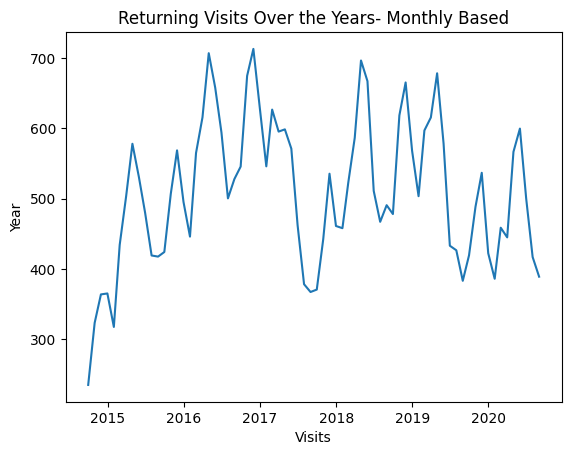

In [ ]:
d_monthly2 = d['Returning.Visits'].resample('M').mean()
plt.plot(d_monthly2)
plt.title('Returning Visits Over the Years- Monthly Based' )
plt.xlabel('Visits')
plt.ylabel('Year')

In [ ]:
model = ExponentialSmoothing(d_monthly2, seasonal='add', trend= 'add', seasonal_periods=12).fit()

In [ ]:
forecast = model.forecast(12)
print(forecast)

2020-09-30    400.565838
2020-10-31    497.155884
2020-11-30    552.018866
2020-12-31    477.976917
2021-01-31    429.668074
2021-02-28    520.562224
2021-03-31    547.335499
2021-04-30    624.858150
2021-05-31    587.588512
2021-06-30    482.941895
2021-07-31    420.678471
2021-08-31    414.918092
Freq: M, dtype: float64


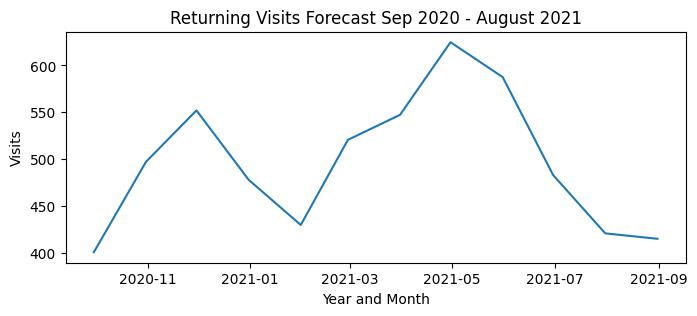

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(forecast)
plt.title('Returning Visits Forecast Sep 2020 - August 2021')
plt.xlabel('Year and Month')
plt.ylabel('Visits')
plt.show()

In [ ]:
forecast_data2 = pd.concat([d_monthly2, forecast], axis=1)
forecast_data2 = forecast_data2.rename(columns={'Returning.Visits': 'Past', 0: 'Forecast'})

In [ ]:
fig = px.line()
fig.add_scatter(x=forecast_data2.index, y=forecast_data2['Past'], mode='lines', name='Past')
fig.add_scatter(x=forecast_data2.index, y=forecast_data2['Forecast'], mode='lines', name='Forecast')
fig.update_layout(
    title=dict(text='Website Returning Visits Past vs Forecast', x=0.5),
    xaxis=dict(title='Year'),
    yaxis_title='Number of Returning Visits'
)
fig.show()